In [ ]:
## In this project we will create a basic neural network will predict.
#the data is mostly clean, we will verify that and then scale the data.
#then we will build and train the model.
#I will leave the reasoning for every code, so that you can follow along.

In [2]:
#We will import several module which we will use it.
#I like to import them when we need them, it's easier to follow along that way.
import pandas as pd
import numpy as np # these twos are needed for data analysis

In [3]:
df = pd.read_csv('cancer_diagnosis.csv') # we loaded our data into a dataframe.
df.head(4) #let's inscpect the data briefly, we are seeing the first few rows.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [5]:
#let's inspect the data more to see the type of data we have in each columns and if there's any null or zero values.
print(df.columns)
df.info()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_me

In [ ]:
## we can get rid of the'id' and 'Unnamed: 32' from this dataframe, and the we will separate the 'diagnosis' column as y-variable.

In [7]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [8]:
# in df.info we saw that there are no null values, let's make sure by this command.
df.isnull().sum() # you can it has returned zero for all the columns, boolean argument in the 'isnull' turns out false for every column and row.

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#let's split that data into X and y variables
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [10]:
# we will split the data into training and testing sets. We need to import a module from sklearn for this process.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, shuffle=True)

#random state is not important, shuffle is by default True, but I put it there to emphasize that we must shuffle our data.

In [11]:
#now we will scale our x_train and x_test data. We have a module from sklearn

from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler() #it scales the data between 0 and 1, so no variable gets extra weights. I found this works better than the 'standardscaler'
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [12]:
#let's inspect the shape of x_train and x_test, and visualise few rows of data
print(x_train.shape, x_test.shape)
x_train[:3]

(398, 30) (171, 30)


array([[0.35990989, 0.23774095, 0.35951769, 0.22268944, 0.44190291,
        0.40072598, 0.1809044 , 0.30526839, 0.30707071, 0.40904128,
        0.09433279, 0.10603246, 0.07289262, 0.05236852, 0.08192542,
        0.11970138, 0.06570112, 0.24547677, 0.01947189, 0.10663231,
        0.29537315, 0.22414712, 0.28066697, 0.15713081, 0.2795351 ,
        0.18463971, 0.14824281, 0.34982818, 0.15305611, 0.19862069],
       [0.36725599, 0.11836321, 0.35181221, 0.2323007 , 0.20829785,
        0.17108417, 0.07949859, 0.13205765, 0.33383838, 0.11967679,
        0.02418975, 0.01099023, 0.02737596, 0.02039231, 0.11214604,
        0.09461652, 0.05105332, 0.22383863, 0.13349127, 0.03970827,
        0.27490681, 0.0988806 , 0.25423212, 0.14775208, 0.27359176,
        0.14204771, 0.10878594, 0.28103093, 0.23071142, 0.08151067],
       [0.26245164, 0.13966858, 0.24521975, 0.15455248, 0.25562721,
        0.06153688, 0.01068182, 0.04388171, 0.19848485, 0.11399869,
        0.1035669 , 0.10298085, 0.08528483, 0.

In [ ]:
#above we can see that we have 30 variables/attributes on each datasets, those will be needed for our nerual network training.

In [13]:
# y variable has two types of data"B" for benign and "M" for Malignant.
# you can check with the following syntax.
print(y.value_counts())
# first we will replace them with numerical label, and then convert them into matrices which can be used the training process.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #it will add the label and replace B and m
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_test[:5]

B    357
M    212
Name: diagnosis, dtype: int64


array([1, 1, 1, 0, 1])

In [14]:
# now we will convert the y-varibale from array like objects to matrices, so that it can be used as output in the neural network training.
#but before that let's take a look at our y_train
print(y_train[:5])

[0 0 0 1 0]


In [15]:
# let's import everything for the neuralnetwork
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential  # we will be using Sequential model for this project
from keras.layers import Dense, Dropout 


In [16]:
#convert y_train into matrices using keras.utils.to_categorical
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_train[:5]
#num classes depends on how many different types of output we have in our data. For this example, it is 2(B and M)
#I apllied only on y_train data, later we will convert our prediction normal y_test data
# so it is unnecessary to convert the y_test data.

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
#you can see above that 0 is coverted into [1,0] matrix and 1 is converted into [0,1] matrix.

In [17]:
# now we will build the sequential model
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(x_train.shape[1],)))# this is our first hidden layer,it will take (30,) as an input_size from the input layer
model.add(Dense(units=200, activation='relu')) #2nd hidden layer will take input automatically from the 
model.add(Dropout(0.5)) #the model will drop randomly 50% of the neuron, so that our model won't overfit.
model.add(Dense(units=2, activation='softmax')) #this is the output layer, because we have two outputs, hence the units=2

#lets compile the model and give the proper optimizer, loss and metrics function
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#take a look at the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 23,702
Trainable params: 23,702
Non-trainable params: 0
_________________________________________________________________


2021-12-30 03:57:16.434313: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-30 03:57:16.436033: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [19]:
#now we will run the model
model.fit(x_train, y_train, batch_size=100, epochs=50, verbose=2,validation_split=0.3, shuffle=True)

Train on 278 samples, validate on 120 samples
Epoch 1/50
 - 0s - loss: 0.3321 - accuracy: 0.8957 - val_loss: 0.3391 - val_accuracy: 0.8833
Epoch 2/50
 - 0s - loss: 0.3048 - accuracy: 0.9029 - val_loss: 0.3176 - val_accuracy: 0.8833
Epoch 3/50
 - 0s - loss: 0.2823 - accuracy: 0.8957 - val_loss: 0.3050 - val_accuracy: 0.8917
Epoch 4/50
 - 0s - loss: 0.2643 - accuracy: 0.9029 - val_loss: 0.2829 - val_accuracy: 0.8917
Epoch 5/50
 - 0s - loss: 0.2493 - accuracy: 0.8957 - val_loss: 0.2480 - val_accuracy: 0.9000
Epoch 6/50
 - 0s - loss: 0.2347 - accuracy: 0.9137 - val_loss: 0.2337 - val_accuracy: 0.9000
Epoch 7/50
 - 0s - loss: 0.2034 - accuracy: 0.9209 - val_loss: 0.2229 - val_accuracy: 0.9083
Epoch 8/50
 - 0s - loss: 0.1988 - accuracy: 0.9173 - val_loss: 0.2108 - val_accuracy: 0.9167
Epoch 9/50
 - 0s - loss: 0.1851 - accuracy: 0.9209 - val_loss: 0.1990 - val_accuracy: 0.9167
Epoch 10/50
 - 0s - loss: 0.1944 - accuracy: 0.9101 - val_loss: 0.1910 - val_accuracy: 0.9167
Epoch 11/50
 - 0s - los

In [ ]:
#number of epochs could have been smaller, it seems like working well in both training sample and the validation sample.

In [20]:
#lets predict by using our model
prediction = model.predict(x_test) #this will give us a matrix out put, we have to convert it to 1d array
prediction = np.argmax(prediction, axis=1) #argmax will convert it into 1d array, let's take look at the prediction data
prediction[:5]

array([1, 1, 1, 0, 1])

In [21]:
#we will quantify our model now by some sklearn.metrics module
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test, prediction)
print(ac)
print(cm)

0.9590643274853801
[[93  1]
 [ 6 71]]


In [ ]:
#lets create beautiful figure to represent the confusion matrix

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(24.0, 0.5, 'Actual')

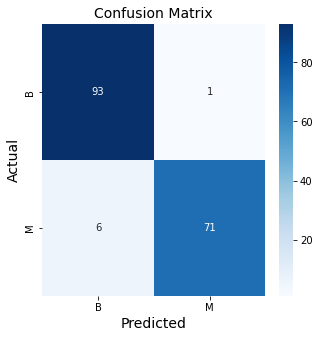

In [30]:
fig = plt.subplots(figsize = (5,5))
fig = sns.heatmap(cm, annot=True, fmt='d',xticklabels=('B','M'), yticklabels=('B', 'M'), cmap='Blues',)
fig.set_title('Confusion Matrix', fontsize=14)
fig.set_xlabel('Predicted', fontsize=14)
fig.set_ylabel('Actual',fontsize=14)

In [31]:
#our out of the box model did really well for this data sets, which was expected.
#Lets save this model(weights, architecture, compiler, loss, optimizer) to your harddrive as a '.h5'for future use or modification.
import os
model.save('caner_diagnosis_deepLearning.h5')